## White cells detection

In [ ]:
import bioformats
import javabridge

from bioformats import ImageReader, get_omexml_metadata

def setup_javabridge(log_level: str = "ERROR"):
    javabridge.start_vm(class_path=bioformats.JARS)
    logger_name = javabridge.get_static_field(
        "org/slf4j/Logger", "ROOT_LOGGER_NAME", "Ljava/lang/String;")
    logger = javabridge.static_call(
        "org/slf4j/LoggerFactory", "getLogger",
        "(Ljava/lang/String;)Lorg/slf4j/Logger;", logger_name)
    level = javabridge.get_static_field(
        "ch/qos/logback/classic/Level", log_level,
        "Lch/qos/logback/classic/Level;")
    javabridge.call(logger, "setLevel",
                     "(Lch/qos/logback/classic/Level;)V", level)

setup_javabridge()

In [ ]:
# Open the image file using ImageReader
file_path = "../data/blood_sample.ome.tif"

# Load the OME-XML metadata
omexml_metadata = get_omexml_metadata(file_path)

# Use ImageReader to read the image
with ImageReader(file_path) as reader:
    # Optionally print OME metadata for debugging
    print(omexml_metadata)
    x0,y0,x1,y1=11024, 11024, 12048, 12048
    
    image=reader.read(series=0, z=0, t=0,XYWH=(x0, y0, x1 - x0, y1 - y0))
    # Check image shape and other details
    print("Image shape:", image.shape) 

<?xml version="1.0" encoding="UTF-8"?><OME xmlns="http://www.openmicroscopy.org/Schemas/OME/2016-06" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.openmicroscopy.org/Schemas/OME/2016-06 http://www.openmicroscopy.org/Schemas/OME/2016-06/ome.xsd"><Image ID="Image:0" Name="blood_sample.ome.tif"><Description>&lt;?xml version="1.0" encoding="UTF-8" standalone="no"?&gt;&lt;!-- Warning: this comment is an OME-XML metadata block, which contains crucial dimensional parameters and other important metadata. Please edit cautiously (if at all), and back up the original data before doing so. For more information, see the OME-TIFF web site: https://docs.openmicroscopy.org/latest/ome-model/ome-tiff/. --&gt;&lt;OME xmlns="http://www.openmicroscopy.org/Schemas/OME/2016-06" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" Creator="OME Bio-Formats 7.0.1" UUID="urn:uuid:4ac0521b-5618-4c65-994a-933520e3ddad" xsi:schemaLocation="http://www.openmicroscopy.org/Schema

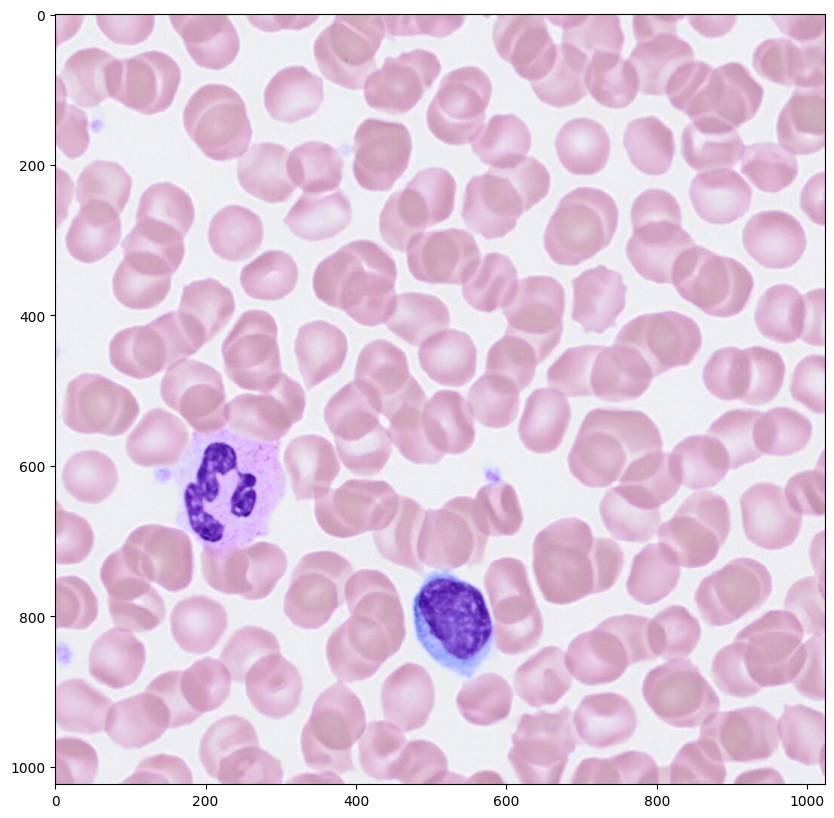

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [ ]:
import torch
from ultralytics import YOLO


model = YOLO("../models/yolo_white_cells.pt")